# Convolve Epoch 2- Problem Statement 3: Sentiment Analysis

We are focussing on problem statement 3 which involves sentiment analysis of customer feedback of Cisco products to identify negative and positive reviews

We are using an open-source library, Flair, for this. It gives us high accuracy and F1 score.

# Imports, download datasets, pre-process datasets

In [ ]:
# install Flair library
!pip install flair

In [ ]:
# imports
import os

#Pandas, NumPy for data handling
import numpy as np 
import pandas as pd

#PyTorch for optimizers, schedulers
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim import AdamW

#Flair for the pre-trained model and trainer
from flair.models import TextClassifier
from flair.data import Sentence
from flair.trainers import ModelTrainer
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
from flair.embeddings import DocumentRNNEmbeddings
from flair.embeddings import TransformerWordEmbeddings
from flair.visual.training_curves import Plotter

In [ ]:
# make a directory for training and testing data

!mkdir /content/data

In [ ]:
# download the training and testing data

!gdown 1VmpeZgh9reH3dUYRUlaqQsj2mh3hhdb- -O /content/data/PS3_train.xlsx
!gdown 1S-_MQQGbBg18OAIawUk7zuIZg62dTy88 -O /content/data/PS3_test.xlsx

In [ ]:
# reorganize the dataset, convert to .csv format required for Flair module

review_df_train = pd.DataFrame(pd.read_excel("/content/data/PS3_train.xlsx"))
review_df_train.rename(columns={"Verbatim Feedback ":"text", "Sentiment (1=Positive & 0= Negative)":"label"}, inplace=True)
review_df_train.to_csv("/content/data/train.csv", index=False, header=True)

review_df_test = pd.DataFrame(pd.read_excel("/content/data/PS3_test.xlsx"))
review_df_test.to_csv("/content/data/test.csv", index=False, header=True)

In [ ]:
# remove the unnecessary .xlsx files

!rm /content/data/PS3_train.xlsx
!rm /content/data/PS3_test.xlsx

# Create the model and training it

2023-01-02 06:16:07,971 Reading data from /content/data
2023-01-02 06:16:07,973 Train: /content/data/train.csv
2023-01-02 06:16:07,975 Dev: None
2023-01-02 06:16:07,978 Test: /content/data/test.csv
2023-01-02 06:16:07,982 Computing label dictionary. Progress:


348it [00:00, 6174.30it/s]

2023-01-02 06:16:08,045 Dictionary created for label 'class' with 3 values: negative (seen 195 times), positive (seen 153 times)


2023-01-02 06:16:14,684 ----------------------------------------------------------------------------------------------------
2023-01-02 06:16:14,690 Model: "TextClassifier(
  (decoder): Linear(in_features=512, out_features=3, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (locked_dropout): LockedDropout(p=0.0)
  (word_dropout): WordDropout(p=0.0)
  (loss_function): CrossEntropyLoss()
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): TransformerWordEmbeddings(
        (model): RobertaModel(
          (embeddings): RobertaEmbeddings(
            (word_embeddings): Embedding(50265, 768, padding_idx=1)
            (position_embeddings): Embedding(514, 768, padding_idx=1)
            (token_type_embeddings): Embedding(1, 768)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (encoder): RobertaEncoder(
            (layer

/usr/local/lib/python3.8/dist-packages/flair/trainers/trainer.py:64: UserWarning: There should be no best model saved at epoch 1 except there is a model from previous trainings in your training folder. All previous best models will be deleted.
  warnings.warn(


2023-01-02 06:16:15,041 epoch 1 - iter 1/11 - loss 0.02989540 - samples/sec: 117.45 - lr: 0.000001
2023-01-02 06:16:15,305 epoch 1 - iter 2/11 - loss 0.02969615 - samples/sec: 125.13 - lr: 0.000001
2023-01-02 06:16:15,527 epoch 1 - iter 3/11 - loss 0.02929514 - samples/sec: 149.61 - lr: 0.000001
2023-01-02 06:16:15,710 epoch 1 - iter 4/11 - loss 0.02929746 - samples/sec: 182.80 - lr: 0.000001
2023-01-02 06:16:15,989 epoch 1 - iter 5/11 - loss 0.02885064 - samples/sec: 118.85 - lr: 0.000001
2023-01-02 06:16:16,619 epoch 1 - iter 6/11 - loss 0.02898752 - samples/sec: 51.56 - lr: 0.000001
2023-01-02 06:16:16,868 epoch 1 - iter 7/11 - loss 0.02904564 - samples/sec: 132.67 - lr: 0.000001
2023-01-02 06:16:17,076 epoch 1 - iter 8/11 - loss 0.02932338 - samples/sec: 160.64 - lr: 0.000001
2023-01-02 06:16:17,290 epoch 1 - iter 9/11 - loss 0.02944657 - samples/sec: 155.76 - lr: 0.000001
2023-01-02 06:16:17,532 epoch 1 - iter 10/11 - loss 0.02935009 - samples/sec: 136.61 - lr: 0.000001
2023-01-02

100%|██████████| 2/2 [00:00<00:00, 22.78it/s]

2023-01-02 06:16:17,836 Evaluating as a multi-label problem: False
2023-01-02 06:16:17,849 DEV : loss 0.04265611618757248 - f1-score (micro avg)  0.6667
2023-01-02 06:16:17,859 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:17,860 saving best model


2023-01-02 06:16:19,543 ----------------------------------------------------------------------------------------------------
2023-01-02 06:16:20,146 epoch 2 - iter 1/11 - loss 0.02831015 - samples/sec: 106.54 - lr: 0.000001
2023-01-02 06:16:20,361 epoch 2 - iter 2/11 - loss 0.02807632 - samples/sec: 154.32 - lr: 0.000001
2023-01-02 06:16:20,986 epoch 2 - iter 3/11 - loss 0.02828354 - samples/sec: 51.96 - lr: 0.000001
2023-01-02 06:16:21,230 epoch 2 - iter 4/11 - loss 0.02787862 - samples/sec: 136.05 - lr: 0.000001
2023-01-02 06:16:21,448 epoch 2 - iter 5/11 - loss 0.02795342 - samples/sec: 152.26 - lr: 0.000001
2023-01-02 06:16:21,674 epoch 2 - iter 6/11 - loss 0.02787904 - samples/sec: 147.10 - lr: 0.000001
2023-01-02 06:16:21,893 epoch 2 - iter 7/11 - loss 0.02789049 - samples/sec: 151.28 - lr: 0.000001
2023-01-02 06:16:22,132 epoch 2 - iter 8/11 - loss 0.02758701 - samples/sec: 138.43 - lr: 0.000001
2023-01-02 06:16:22,390 epoch 2 - iter 9/11 - loss 0.02734447 - samples/sec: 127.80 

100%|██████████| 2/2 [00:00<00:00, 21.57it/s]

2023-01-02 06:16:22,983 Evaluating as a multi-label problem: False
2023-01-02 06:16:22,994 DEV : loss 0.04026276245713234 - f1-score (micro avg)  0.7179
2023-01-02 06:16:23,004 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:23,006 saving best model


2023-01-02 06:16:24,825 ----------------------------------------------------------------------------------------------------
2023-01-02 06:16:25,173 epoch 3 - iter 1/11 - loss 0.02522106 - samples/sec: 94.92 - lr: 0.000001
2023-01-02 06:16:25,372 epoch 3 - iter 2/11 - loss 0.02578511 - samples/sec: 167.54 - lr: 0.000001
2023-01-02 06:16:25,636 epoch 3 - iter 3/11 - loss 0.02536031 - samples/sec: 125.68 - lr: 0.000001
2023-01-02 06:16:25,886 epoch 3 - iter 4/11 - loss 0.02536229 - samples/sec: 132.07 - lr: 0.000001
2023-01-02 06:16:26,101 epoch 3 - iter 5/11 - loss 0.02536777 - samples/sec: 154.84 - lr: 0.000001
2023-01-02 06:16:26,339 epoch 3 - iter 6/11 - loss 0.02553632 - samples/sec: 139.05 - lr: 0.000001
2023-01-02 06:16:26,565 epoch 3 - iter 7/11 - loss 0.02576692 - samples/sec: 146.91 - lr: 0.000001
2023-01-02 06:16:27,195 epoch 3 - iter 8/11 - loss 0.02585119 - samples/sec: 51.58 - lr: 0.000001
2023-01-02 06:16:27,440 epoch 3 - iter 9/11 - loss 0.02586881 - samples/sec: 135.74 -

100%|██████████| 2/2 [00:00<00:00, 23.55it/s]

2023-01-02 06:16:27,998 Evaluating as a multi-label problem: False
2023-01-02 06:16:28,008 DEV : loss 0.038067568093538284 - f1-score (micro avg)  0.7692
2023-01-02 06:16:28,016 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:28,018 saving best model


2023-01-02 06:16:29,729 ----------------------------------------------------------------------------------------------------
2023-01-02 06:16:30,005 epoch 4 - iter 1/11 - loss 0.02495911 - samples/sec: 120.67 - lr: 0.000001
2023-01-02 06:16:30,259 epoch 4 - iter 2/11 - loss 0.02491671 - samples/sec: 131.05 - lr: 0.000001
2023-01-02 06:16:30,475 epoch 4 - iter 3/11 - loss 0.02482638 - samples/sec: 154.74 - lr: 0.000001
2023-01-02 06:16:31,107 epoch 4 - iter 4/11 - loss 0.02443052 - samples/sec: 51.36 - lr: 0.000001
2023-01-02 06:16:31,390 epoch 4 - iter 5/11 - loss 0.02501586 - samples/sec: 117.15 - lr: 0.000001
2023-01-02 06:16:31,596 epoch 4 - iter 6/11 - loss 0.02492087 - samples/sec: 161.67 - lr: 0.000001
2023-01-02 06:16:31,781 epoch 4 - iter 7/11 - loss 0.02506259 - samples/sec: 178.60 - lr: 0.000001
2023-01-02 06:16:32,003 epoch 4 - iter 8/11 - loss 0.02482518 - samples/sec: 150.33 - lr: 0.000001
2023-01-02 06:16:32,208 epoch 4 - iter 9/11 - loss 0.02470889 - samples/sec: 162.83 

100%|██████████| 2/2 [00:00<00:00, 24.15it/s]

2023-01-02 06:16:32,749 Evaluating as a multi-label problem: False
2023-01-02 06:16:32,760 DEV : loss 0.03599303588271141 - f1-score (micro avg)  0.7949
2023-01-02 06:16:32,770 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:32,772 saving best model


2023-01-02 06:16:34,478 ----------------------------------------------------------------------------------------------------
2023-01-02 06:16:34,745 epoch 5 - iter 1/11 - loss 0.02986105 - samples/sec: 124.25 - lr: 0.000001
2023-01-02 06:16:34,975 epoch 5 - iter 2/11 - loss 0.02743720 - samples/sec: 144.47 - lr: 0.000001
2023-01-02 06:16:35,210 epoch 5 - iter 3/11 - loss 0.02565178 - samples/sec: 142.27 - lr: 0.000001
2023-01-02 06:16:35,456 epoch 5 - iter 4/11 - loss 0.02478469 - samples/sec: 134.26 - lr: 0.000001
2023-01-02 06:16:35,670 epoch 5 - iter 5/11 - loss 0.02479580 - samples/sec: 156.01 - lr: 0.000001
2023-01-02 06:16:35,939 epoch 5 - iter 6/11 - loss 0.02471541 - samples/sec: 122.43 - lr: 0.000001
2023-01-02 06:16:36,192 epoch 5 - iter 7/11 - loss 0.02475263 - samples/sec: 130.93 - lr: 0.000001
2023-01-02 06:16:36,422 epoch 5 - iter 8/11 - loss 0.02485074 - samples/sec: 144.32 - lr: 0.000001
2023-01-02 06:16:37,075 epoch 5 - iter 9/11 - loss 0.02479595 - samples/sec: 49.79 

100%|██████████| 2/2 [00:00<00:00, 24.16it/s]

2023-01-02 06:16:37,555 Evaluating as a multi-label problem: False
2023-01-02 06:16:37,566 DEV : loss 0.03392515331506729 - f1-score (micro avg)  0.8718
2023-01-02 06:16:37,575 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:37,576 saving best model


2023-01-02 06:16:39,323 ----------------------------------------------------------------------------------------------------
2023-01-02 06:16:39,641 epoch 6 - iter 1/11 - loss 0.02498012 - samples/sec: 104.84 - lr: 0.000001
2023-01-02 06:16:40,301 epoch 6 - iter 2/11 - loss 0.02347327 - samples/sec: 49.26 - lr: 0.000001
2023-01-02 06:16:40,471 epoch 6 - iter 3/11 - loss 0.02386504 - samples/sec: 197.37 - lr: 0.000001
2023-01-02 06:16:40,673 epoch 6 - iter 4/11 - loss 0.02381759 - samples/sec: 164.90 - lr: 0.000001
2023-01-02 06:16:40,881 epoch 6 - iter 5/11 - loss 0.02375536 - samples/sec: 161.02 - lr: 0.000001
2023-01-02 06:16:41,079 epoch 6 - iter 6/11 - loss 0.02365659 - samples/sec: 168.03 - lr: 0.000001
2023-01-02 06:16:41,272 epoch 6 - iter 7/11 - loss 0.02346403 - samples/sec: 172.88 - lr: 0.000001
2023-01-02 06:16:41,521 epoch 6 - iter 8/11 - loss 0.02328595 - samples/sec: 132.74 - lr: 0.000001
2023-01-02 06:16:41,775 epoch 6 - iter 9/11 - loss 0.02320541 - samples/sec: 130.40 

100%|██████████| 2/2 [00:00<00:00, 22.62it/s]

2023-01-02 06:16:42,369 Evaluating as a multi-label problem: False
2023-01-02 06:16:42,384 DEV : loss 0.03195177763700485 - f1-score (micro avg)  0.8974
2023-01-02 06:16:42,397 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:42,399 saving best model


2023-01-02 06:16:44,141 ----------------------------------------------------------------------------------------------------
2023-01-02 06:16:44,489 epoch 7 - iter 1/11 - loss 0.02077607 - samples/sec: 94.72 - lr: 0.000001
2023-01-02 06:16:44,710 epoch 7 - iter 2/11 - loss 0.02166717 - samples/sec: 151.08 - lr: 0.000001
2023-01-02 06:16:44,930 epoch 7 - iter 3/11 - loss 0.02167204 - samples/sec: 151.56 - lr: 0.000001
2023-01-02 06:16:45,569 epoch 7 - iter 4/11 - loss 0.02180412 - samples/sec: 50.91 - lr: 0.000001
2023-01-02 06:16:45,800 epoch 7 - iter 5/11 - loss 0.02197992 - samples/sec: 143.55 - lr: 0.000001
2023-01-02 06:16:46,071 epoch 7 - iter 6/11 - loss 0.02213547 - samples/sec: 121.68 - lr: 0.000001
2023-01-02 06:16:46,285 epoch 7 - iter 7/11 - loss 0.02211042 - samples/sec: 155.52 - lr: 0.000001
2023-01-02 06:16:46,503 epoch 7 - iter 8/11 - loss 0.02222287 - samples/sec: 152.10 - lr: 0.000001
2023-01-02 06:16:46,714 epoch 7 - iter 9/11 - loss 0.02237397 - samples/sec: 157.61 -

100%|██████████| 2/2 [00:00<00:00, 23.59it/s]

2023-01-02 06:16:47,296 Evaluating as a multi-label problem: False
2023-01-02 06:16:47,310 DEV : loss 0.030080299824476242 - f1-score (micro avg)  0.9487
2023-01-02 06:16:47,321 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:47,322 saving best model


2023-01-02 06:16:49,204 ----------------------------------------------------------------------------------------------------
2023-01-02 06:16:49,920 epoch 8 - iter 1/11 - loss 0.02064914 - samples/sec: 45.47 - lr: 0.000001
2023-01-02 06:16:50,147 epoch 8 - iter 2/11 - loss 0.02078340 - samples/sec: 146.63 - lr: 0.000001
2023-01-02 06:16:50,341 epoch 8 - iter 3/11 - loss 0.02109717 - samples/sec: 172.17 - lr: 0.000001
2023-01-02 06:16:50,595 epoch 8 - iter 4/11 - loss 0.02144166 - samples/sec: 130.13 - lr: 0.000001
2023-01-02 06:16:50,818 epoch 8 - iter 5/11 - loss 0.02205704 - samples/sec: 148.71 - lr: 0.000001
2023-01-02 06:16:51,073 epoch 8 - iter 6/11 - loss 0.02203595 - samples/sec: 129.24 - lr: 0.000001
2023-01-02 06:16:51,318 epoch 8 - iter 7/11 - loss 0.02194998 - samples/sec: 135.60 - lr: 0.000001
2023-01-02 06:16:51,514 epoch 8 - iter 8/11 - loss 0.02166955 - samples/sec: 169.89 - lr: 0.000001
2023-01-02 06:16:51,718 epoch 8 - iter 9/11 - loss 0.02213922 - samples/sec: 162.60 

100%|██████████| 2/2 [00:00<00:00, 23.70it/s]

2023-01-02 06:16:52,264 Evaluating as a multi-label problem: False
2023-01-02 06:16:52,274 DEV : loss 0.02827140875160694 - f1-score (micro avg)  0.9487
2023-01-02 06:16:52,283 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:52,286 ----------------------------------------------------------------------------------------------------


2023-01-02 06:16:52,545 epoch 9 - iter 1/11 - loss 0.02072925 - samples/sec: 129.53 - lr: 0.000001
2023-01-02 06:16:52,737 epoch 9 - iter 2/11 - loss 0.02125158 - samples/sec: 176.62 - lr: 0.000001
2023-01-02 06:16:53,001 epoch 9 - iter 3/11 - loss 0.02050594 - samples/sec: 125.13 - lr: 0.000001
2023-01-02 06:16:53,198 epoch 9 - iter 4/11 - loss 0.02131092 - samples/sec: 168.70 - lr: 0.000001
2023-01-02 06:16:53,430 epoch 9 - iter 5/11 - loss 0.02112567 - samples/sec: 143.78 - lr: 0.000001
2023-01-02 06:16:53,683 epoch 9 - iter 6/11 - loss 0.02076514 - samples/sec: 131.32 - lr: 0.000001
2023-01-02 06:16:53,913 epoch 9 - iter 7/11 - loss 0.02029027 - samples/sec: 145.74 - lr: 0.000001
2023-01-02 06:16:54,155 epoch 9 - iter 8/11 - loss 0.02043234 - samples/sec: 137.60 - lr: 0.000001
2023-01-02 06:16:54,387 epoch 9 - iter 9/11 - loss 0.02007143 - samples/sec: 142.39 - lr: 0.000001
2023-01-02 06:16:54,636 epoch 9 - iter 10/11 - loss 0.01986380 - samples/sec: 132.99 - lr: 0.000001
2023-01-0

100%|██████████| 2/2 [00:00<00:00, 22.98it/s]

2023-01-02 06:16:55,299 Evaluating as a multi-label problem: False
2023-01-02 06:16:55,311 DEV : loss 0.026557443663477898 - f1-score (micro avg)  0.9487
2023-01-02 06:16:55,321 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:55,322 ----------------------------------------------------------------------------------------------------


2023-01-02 06:16:55,538 epoch 10 - iter 1/11 - loss 0.02186779 - samples/sec: 155.67 - lr: 0.000001
2023-01-02 06:16:55,781 epoch 10 - iter 2/11 - loss 0.02128224 - samples/sec: 135.95 - lr: 0.000001
2023-01-02 06:16:56,018 epoch 10 - iter 3/11 - loss 0.02063309 - samples/sec: 140.06 - lr: 0.000001
2023-01-02 06:16:56,230 epoch 10 - iter 4/11 - loss 0.02127080 - samples/sec: 157.18 - lr: 0.000001
2023-01-02 06:16:56,444 epoch 10 - iter 5/11 - loss 0.02096703 - samples/sec: 155.97 - lr: 0.000001
2023-01-02 06:16:56,711 epoch 10 - iter 6/11 - loss 0.02105451 - samples/sec: 124.23 - lr: 0.000001
2023-01-02 06:16:56,959 epoch 10 - iter 7/11 - loss 0.02071576 - samples/sec: 133.42 - lr: 0.000001
2023-01-02 06:16:57,605 epoch 10 - iter 8/11 - loss 0.02045297 - samples/sec: 50.35 - lr: 0.000001
2023-01-02 06:16:57,858 epoch 10 - iter 9/11 - loss 0.02037713 - samples/sec: 130.48 - lr: 0.000001
2023-01-02 06:16:58,113 epoch 10 - iter 10/11 - loss 0.02011282 - samples/sec: 130.31 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 24.01it/s]

2023-01-02 06:16:58,418 Evaluating as a multi-label problem: False
2023-01-02 06:16:58,430 DEV : loss 0.024827666580677032 - f1-score (micro avg)  0.9487
2023-01-02 06:16:58,439 BAD EPOCHS (no improvement): 0
2023-01-02 06:16:58,440 ----------------------------------------------------------------------------------------------------


2023-01-02 06:16:58,669 epoch 11 - iter 1/11 - loss 0.02040754 - samples/sec: 146.46 - lr: 0.000001
2023-01-02 06:16:58,888 epoch 11 - iter 2/11 - loss 0.01859869 - samples/sec: 151.24 - lr: 0.000001
2023-01-02 06:16:59,142 epoch 11 - iter 3/11 - loss 0.01899439 - samples/sec: 130.99 - lr: 0.000001
2023-01-02 06:16:59,352 epoch 11 - iter 4/11 - loss 0.01903778 - samples/sec: 159.16 - lr: 0.000001
2023-01-02 06:16:59,621 epoch 11 - iter 5/11 - loss 0.01947457 - samples/sec: 122.87 - lr: 0.000001
2023-01-02 06:16:59,806 epoch 11 - iter 6/11 - loss 0.01977927 - samples/sec: 179.80 - lr: 0.000001
2023-01-02 06:17:00,065 epoch 11 - iter 7/11 - loss 0.01973662 - samples/sec: 127.88 - lr: 0.000001
2023-01-02 06:17:00,312 epoch 11 - iter 8/11 - loss 0.01929715 - samples/sec: 135.14 - lr: 0.000001
2023-01-02 06:17:00,543 epoch 11 - iter 9/11 - loss 0.01903277 - samples/sec: 144.23 - lr: 0.000001
2023-01-02 06:17:01,187 epoch 11 - iter 10/11 - loss 0.01910678 - samples/sec: 50.42 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.85it/s]

2023-01-02 06:17:01,458 Evaluating as a multi-label problem: False
2023-01-02 06:17:01,471 DEV : loss 0.023293551057577133 - f1-score (micro avg)  0.9487
2023-01-02 06:17:01,481 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:01,483 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:01,719 epoch 12 - iter 1/11 - loss 0.01525586 - samples/sec: 141.93 - lr: 0.000001
2023-01-02 06:17:01,919 epoch 12 - iter 2/11 - loss 0.01631583 - samples/sec: 166.67 - lr: 0.000001
2023-01-02 06:17:02,559 epoch 12 - iter 3/11 - loss 0.01775332 - samples/sec: 50.70 - lr: 0.000001
2023-01-02 06:17:02,790 epoch 12 - iter 4/11 - loss 0.01777714 - samples/sec: 144.12 - lr: 0.000001
2023-01-02 06:17:03,025 epoch 12 - iter 5/11 - loss 0.01836456 - samples/sec: 142.17 - lr: 0.000001
2023-01-02 06:17:03,211 epoch 12 - iter 6/11 - loss 0.01842600 - samples/sec: 180.64 - lr: 0.000001
2023-01-02 06:17:03,418 epoch 12 - iter 7/11 - loss 0.01875475 - samples/sec: 161.64 - lr: 0.000001
2023-01-02 06:17:03,678 epoch 12 - iter 8/11 - loss 0.01862965 - samples/sec: 127.03 - lr: 0.000001
2023-01-02 06:17:03,927 epoch 12 - iter 9/11 - loss 0.01863949 - samples/sec: 133.25 - lr: 0.000001
2023-01-02 06:17:04,191 epoch 12 - iter 10/11 - loss 0.01866140 - samples/sec: 125.14 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 23.94it/s]

2023-01-02 06:17:04,521 Evaluating as a multi-label problem: False
2023-01-02 06:17:04,532 DEV : loss 0.02173517644405365 - f1-score (micro avg)  0.9487
2023-01-02 06:17:04,541 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:04,544 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:04,767 epoch 13 - iter 1/11 - loss 0.01886494 - samples/sec: 148.66 - lr: 0.000001
2023-01-02 06:17:05,014 epoch 13 - iter 2/11 - loss 0.01651389 - samples/sec: 134.39 - lr: 0.000001
2023-01-02 06:17:05,194 epoch 13 - iter 3/11 - loss 0.01768129 - samples/sec: 184.25 - lr: 0.000001
2023-01-02 06:17:05,381 epoch 13 - iter 4/11 - loss 0.01783668 - samples/sec: 178.24 - lr: 0.000001
2023-01-02 06:17:05,600 epoch 13 - iter 5/11 - loss 0.01792527 - samples/sec: 151.74 - lr: 0.000001
2023-01-02 06:17:05,828 epoch 13 - iter 6/11 - loss 0.01774277 - samples/sec: 145.66 - lr: 0.000001
2023-01-02 06:17:06,079 epoch 13 - iter 7/11 - loss 0.01809593 - samples/sec: 131.74 - lr: 0.000001
2023-01-02 06:17:06,281 epoch 13 - iter 8/11 - loss 0.01808472 - samples/sec: 164.80 - lr: 0.000001
2023-01-02 06:17:06,542 epoch 13 - iter 9/11 - loss 0.01814413 - samples/sec: 127.70 - lr: 0.000001
2023-01-02 06:17:07,190 epoch 13 - iter 10/11 - loss 0.01819014 - samples/sec: 50.03 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 23.55it/s]

2023-01-02 06:17:07,537 Evaluating as a multi-label problem: False
2023-01-02 06:17:07,547 DEV : loss 0.02025836519896984 - f1-score (micro avg)  0.9487
2023-01-02 06:17:07,556 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:07,557 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:07,768 epoch 14 - iter 1/11 - loss 0.01446296 - samples/sec: 160.55 - lr: 0.000001
2023-01-02 06:17:07,995 epoch 14 - iter 2/11 - loss 0.01501851 - samples/sec: 145.27 - lr: 0.000001
2023-01-02 06:17:08,212 epoch 14 - iter 3/11 - loss 0.01589922 - samples/sec: 152.91 - lr: 0.000001
2023-01-02 06:17:08,487 epoch 14 - iter 4/11 - loss 0.01544673 - samples/sec: 120.80 - lr: 0.000001
2023-01-02 06:17:08,751 epoch 14 - iter 5/11 - loss 0.01578462 - samples/sec: 125.45 - lr: 0.000001
2023-01-02 06:17:08,962 epoch 14 - iter 6/11 - loss 0.01639730 - samples/sec: 156.65 - lr: 0.000001
2023-01-02 06:17:09,161 epoch 14 - iter 7/11 - loss 0.01658227 - samples/sec: 168.30 - lr: 0.000001
2023-01-02 06:17:09,373 epoch 14 - iter 8/11 - loss 0.01680817 - samples/sec: 156.57 - lr: 0.000001
2023-01-02 06:17:09,597 epoch 14 - iter 9/11 - loss 0.01680823 - samples/sec: 148.42 - lr: 0.000001
2023-01-02 06:17:09,836 epoch 14 - iter 10/11 - loss 0.01710404 - samples/sec: 139.11 - lr: 0.000001

100%|██████████| 2/2 [00:00<00:00, 23.49it/s]

2023-01-02 06:17:10,514 Evaluating as a multi-label problem: False
2023-01-02 06:17:10,526 DEV : loss 0.01888488419353962 - f1-score (micro avg)  0.9744
2023-01-02 06:17:10,535 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:10,537 saving best model


2023-01-02 06:17:12,426 ----------------------------------------------------------------------------------------------------
2023-01-02 06:17:12,769 epoch 15 - iter 1/11 - loss 0.01567290 - samples/sec: 96.46 - lr: 0.000001
2023-01-02 06:17:13,020 epoch 15 - iter 2/11 - loss 0.01725491 - samples/sec: 131.98 - lr: 0.000001
2023-01-02 06:17:13,665 epoch 15 - iter 3/11 - loss 0.01638306 - samples/sec: 50.37 - lr: 0.000001
2023-01-02 06:17:13,888 epoch 15 - iter 4/11 - loss 0.01666592 - samples/sec: 149.15 - lr: 0.000001
2023-01-02 06:17:14,105 epoch 15 - iter 5/11 - loss 0.01683157 - samples/sec: 153.79 - lr: 0.000001
2023-01-02 06:17:14,330 epoch 15 - iter 6/11 - loss 0.01640715 - samples/sec: 147.50 - lr: 0.000001
2023-01-02 06:17:14,533 epoch 15 - iter 7/11 - loss 0.01665376 - samples/sec: 163.18 - lr: 0.000001
2023-01-02 06:17:14,800 epoch 15 - iter 8/11 - loss 0.01652190 - samples/sec: 124.77 - lr: 0.000001
2023-01-02 06:17:15,059 epoch 15 - iter 9/11 - loss 0.01649746 - samples/sec:

100%|██████████| 2/2 [00:00<00:00, 23.96it/s]

2023-01-02 06:17:15,573 Evaluating as a multi-label problem: False
2023-01-02 06:17:15,583 DEV : loss 0.017552679404616356 - f1-score (micro avg)  0.9744
2023-01-02 06:17:15,592 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:15,593 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:15,863 epoch 16 - iter 1/11 - loss 0.01321395 - samples/sec: 124.05 - lr: 0.000001
2023-01-02 06:17:16,082 epoch 16 - iter 2/11 - loss 0.01460123 - samples/sec: 151.69 - lr: 0.000001
2023-01-02 06:17:16,289 epoch 16 - iter 3/11 - loss 0.01489780 - samples/sec: 160.08 - lr: 0.000001
2023-01-02 06:17:16,516 epoch 16 - iter 4/11 - loss 0.01530538 - samples/sec: 146.09 - lr: 0.000001
2023-01-02 06:17:16,777 epoch 16 - iter 5/11 - loss 0.01564776 - samples/sec: 126.55 - lr: 0.000001
2023-01-02 06:17:17,409 epoch 16 - iter 6/11 - loss 0.01559666 - samples/sec: 51.38 - lr: 0.000001
2023-01-02 06:17:17,669 epoch 16 - iter 7/11 - loss 0.01591118 - samples/sec: 127.45 - lr: 0.000001
2023-01-02 06:17:17,901 epoch 16 - iter 8/11 - loss 0.01563765 - samples/sec: 142.82 - lr: 0.000001
2023-01-02 06:17:18,114 epoch 16 - iter 9/11 - loss 0.01612956 - samples/sec: 155.82 - lr: 0.000001
2023-01-02 06:17:18,334 epoch 16 - iter 10/11 - loss 0.01612770 - samples/sec: 151.21 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.35it/s]

2023-01-02 06:17:18,645 Evaluating as a multi-label problem: False
2023-01-02 06:17:18,654 DEV : loss 0.016510242596268654 - f1-score (micro avg)  0.9744
2023-01-02 06:17:18,663 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:18,664 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:18,886 epoch 17 - iter 1/11 - loss 0.01237454 - samples/sec: 151.47 - lr: 0.000001
2023-01-02 06:17:19,118 epoch 17 - iter 2/11 - loss 0.01419418 - samples/sec: 142.56 - lr: 0.000001
2023-01-02 06:17:19,350 epoch 17 - iter 3/11 - loss 0.01489430 - samples/sec: 142.73 - lr: 0.000001
2023-01-02 06:17:19,617 epoch 17 - iter 4/11 - loss 0.01492226 - samples/sec: 124.16 - lr: 0.000001
2023-01-02 06:17:20,253 epoch 17 - iter 5/11 - loss 0.01460504 - samples/sec: 51.09 - lr: 0.000001
2023-01-02 06:17:20,499 epoch 17 - iter 6/11 - loss 0.01511896 - samples/sec: 134.34 - lr: 0.000001
2023-01-02 06:17:20,781 epoch 17 - iter 7/11 - loss 0.01458419 - samples/sec: 117.37 - lr: 0.000001
2023-01-02 06:17:21,009 epoch 17 - iter 8/11 - loss 0.01421643 - samples/sec: 146.11 - lr: 0.000001
2023-01-02 06:17:21,210 epoch 17 - iter 9/11 - loss 0.01450731 - samples/sec: 165.73 - lr: 0.000001
2023-01-02 06:17:21,409 epoch 17 - iter 10/11 - loss 0.01512541 - samples/sec: 167.58 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 23.34it/s]

2023-01-02 06:17:21,728 Evaluating as a multi-label problem: False
2023-01-02 06:17:21,739 DEV : loss 0.01549516897648573 - f1-score (micro avg)  0.9744
2023-01-02 06:17:21,748 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:21,749 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:21,963 epoch 18 - iter 1/11 - loss 0.01498811 - samples/sec: 156.24 - lr: 0.000001
2023-01-02 06:17:22,616 epoch 18 - iter 2/11 - loss 0.01475933 - samples/sec: 49.88 - lr: 0.000001
2023-01-02 06:17:22,840 epoch 18 - iter 3/11 - loss 0.01435720 - samples/sec: 148.85 - lr: 0.000001
2023-01-02 06:17:23,058 epoch 18 - iter 4/11 - loss 0.01388295 - samples/sec: 154.17 - lr: 0.000001
2023-01-02 06:17:23,250 epoch 18 - iter 5/11 - loss 0.01343110 - samples/sec: 174.01 - lr: 0.000001
2023-01-02 06:17:23,506 epoch 18 - iter 6/11 - loss 0.01405597 - samples/sec: 129.78 - lr: 0.000001
2023-01-02 06:17:23,779 epoch 18 - iter 7/11 - loss 0.01389495 - samples/sec: 121.65 - lr: 0.000001
2023-01-02 06:17:24,011 epoch 18 - iter 8/11 - loss 0.01404436 - samples/sec: 144.09 - lr: 0.000001
2023-01-02 06:17:24,203 epoch 18 - iter 9/11 - loss 0.01450832 - samples/sec: 173.41 - lr: 0.000001
2023-01-02 06:17:24,425 epoch 18 - iter 10/11 - loss 0.01481733 - samples/sec: 151.02 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.58it/s]

2023-01-02 06:17:24,751 Evaluating as a multi-label problem: False
2023-01-02 06:17:24,763 DEV : loss 0.0144841643050313 - f1-score (micro avg)  0.9744
2023-01-02 06:17:24,775 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:24,776 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:24,962 epoch 19 - iter 1/11 - loss 0.01450425 - samples/sec: 180.93 - lr: 0.000001
2023-01-02 06:17:25,219 epoch 19 - iter 2/11 - loss 0.01509607 - samples/sec: 128.48 - lr: 0.000001
2023-01-02 06:17:25,487 epoch 19 - iter 3/11 - loss 0.01481535 - samples/sec: 123.57 - lr: 0.000001
2023-01-02 06:17:25,742 epoch 19 - iter 4/11 - loss 0.01470131 - samples/sec: 130.42 - lr: 0.000001
2023-01-02 06:17:26,007 epoch 19 - iter 5/11 - loss 0.01505948 - samples/sec: 124.94 - lr: 0.000001
2023-01-02 06:17:26,660 epoch 19 - iter 6/11 - loss 0.01436067 - samples/sec: 49.86 - lr: 0.000001
2023-01-02 06:17:26,890 epoch 19 - iter 7/11 - loss 0.01433646 - samples/sec: 145.09 - lr: 0.000001
2023-01-02 06:17:27,115 epoch 19 - iter 8/11 - loss 0.01437333 - samples/sec: 147.33 - lr: 0.000001
2023-01-02 06:17:27,352 epoch 19 - iter 9/11 - loss 0.01481230 - samples/sec: 140.04 - lr: 0.000001
2023-01-02 06:17:27,590 epoch 19 - iter 10/11 - loss 0.01490379 - samples/sec: 140.00 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 23.30it/s]

2023-01-02 06:17:27,918 Evaluating as a multi-label problem: False
2023-01-02 06:17:27,928 DEV : loss 0.013508237898349762 - f1-score (micro avg)  0.9744
2023-01-02 06:17:27,939 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:27,941 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:28,590 epoch 20 - iter 1/11 - loss 0.01814879 - samples/sec: 50.22 - lr: 0.000001
2023-01-02 06:17:28,834 epoch 20 - iter 2/11 - loss 0.01632563 - samples/sec: 136.06 - lr: 0.000001
2023-01-02 06:17:29,049 epoch 20 - iter 3/11 - loss 0.01423446 - samples/sec: 155.38 - lr: 0.000001
2023-01-02 06:17:29,247 epoch 20 - iter 4/11 - loss 0.01362282 - samples/sec: 168.06 - lr: 0.000001
2023-01-02 06:17:29,434 epoch 20 - iter 5/11 - loss 0.01405408 - samples/sec: 178.14 - lr: 0.000001
2023-01-02 06:17:29,619 epoch 20 - iter 6/11 - loss 0.01390292 - samples/sec: 179.70 - lr: 0.000001
2023-01-02 06:17:29,833 epoch 20 - iter 7/11 - loss 0.01383092 - samples/sec: 156.44 - lr: 0.000001
2023-01-02 06:17:30,094 epoch 20 - iter 8/11 - loss 0.01381681 - samples/sec: 127.67 - lr: 0.000001
2023-01-02 06:17:30,304 epoch 20 - iter 9/11 - loss 0.01389545 - samples/sec: 158.64 - lr: 0.000001
2023-01-02 06:17:30,555 epoch 20 - iter 10/11 - loss 0.01380765 - samples/sec: 131.68 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.41it/s]

2023-01-02 06:17:30,865 Evaluating as a multi-label problem: False
2023-01-02 06:17:30,877 DEV : loss 0.012749857269227505 - f1-score (micro avg)  0.9744
2023-01-02 06:17:30,886 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:30,888 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:31,161 epoch 21 - iter 1/11 - loss 0.01310178 - samples/sec: 122.19 - lr: 0.000001
2023-01-02 06:17:31,369 epoch 21 - iter 2/11 - loss 0.01425046 - samples/sec: 160.50 - lr: 0.000001
2023-01-02 06:17:31,559 epoch 21 - iter 3/11 - loss 0.01356446 - samples/sec: 175.82 - lr: 0.000001
2023-01-02 06:17:31,791 epoch 21 - iter 4/11 - loss 0.01346496 - samples/sec: 143.96 - lr: 0.000001
2023-01-02 06:17:32,012 epoch 21 - iter 5/11 - loss 0.01284502 - samples/sec: 150.82 - lr: 0.000001
2023-01-02 06:17:32,213 epoch 21 - iter 6/11 - loss 0.01307929 - samples/sec: 167.07 - lr: 0.000001
2023-01-02 06:17:32,471 epoch 21 - iter 7/11 - loss 0.01362003 - samples/sec: 128.72 - lr: 0.000001
2023-01-02 06:17:32,682 epoch 21 - iter 8/11 - loss 0.01370843 - samples/sec: 157.85 - lr: 0.000001
2023-01-02 06:17:33,336 epoch 21 - iter 9/11 - loss 0.01333620 - samples/sec: 49.63 - lr: 0.000001
2023-01-02 06:17:33,568 epoch 21 - iter 10/11 - loss 0.01352899 - samples/sec: 143.65 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.97it/s]

2023-01-02 06:17:33,902 Evaluating as a multi-label problem: False
2023-01-02 06:17:33,918 DEV : loss 0.01214172039180994 - f1-score (micro avg)  0.9744
2023-01-02 06:17:33,928 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:33,930 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:34,200 epoch 22 - iter 1/11 - loss 0.01286309 - samples/sec: 122.63 - lr: 0.000001
2023-01-02 06:17:34,517 epoch 22 - iter 2/11 - loss 0.01458783 - samples/sec: 104.45 - lr: 0.000001
2023-01-02 06:17:34,756 epoch 22 - iter 3/11 - loss 0.01447976 - samples/sec: 139.98 - lr: 0.000001
2023-01-02 06:17:35,041 epoch 22 - iter 4/11 - loss 0.01342394 - samples/sec: 118.45 - lr: 0.000001
2023-01-02 06:17:35,319 epoch 22 - iter 5/11 - loss 0.01333000 - samples/sec: 119.88 - lr: 0.000001
2023-01-02 06:17:36,016 epoch 22 - iter 6/11 - loss 0.01366514 - samples/sec: 46.79 - lr: 0.000001
2023-01-02 06:17:36,329 epoch 22 - iter 7/11 - loss 0.01384901 - samples/sec: 106.01 - lr: 0.000001
2023-01-02 06:17:36,538 epoch 22 - iter 8/11 - loss 0.01403023 - samples/sec: 161.69 - lr: 0.000001
2023-01-02 06:17:36,826 epoch 22 - iter 9/11 - loss 0.01407663 - samples/sec: 116.68 - lr: 0.000001
2023-01-02 06:17:37,109 epoch 22 - iter 10/11 - loss 0.01397567 - samples/sec: 120.78 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 15.97it/s]

2023-01-02 06:17:37,477 Evaluating as a multi-label problem: False
2023-01-02 06:17:37,489 DEV : loss 0.01159027498215437 - f1-score (micro avg)  0.9744
2023-01-02 06:17:37,502 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:37,504 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:37,709 epoch 23 - iter 1/11 - loss 0.01525807 - samples/sec: 163.41 - lr: 0.000001
2023-01-02 06:17:38,357 epoch 23 - iter 2/11 - loss 0.01219652 - samples/sec: 50.10 - lr: 0.000001
2023-01-02 06:17:38,581 epoch 23 - iter 3/11 - loss 0.01160086 - samples/sec: 149.47 - lr: 0.000001
2023-01-02 06:17:38,800 epoch 23 - iter 4/11 - loss 0.01267782 - samples/sec: 151.19 - lr: 0.000001
2023-01-02 06:17:39,040 epoch 23 - iter 5/11 - loss 0.01208552 - samples/sec: 139.11 - lr: 0.000001
2023-01-02 06:17:39,303 epoch 23 - iter 6/11 - loss 0.01195913 - samples/sec: 125.33 - lr: 0.000001
2023-01-02 06:17:39,552 epoch 23 - iter 7/11 - loss 0.01228731 - samples/sec: 132.96 - lr: 0.000001
2023-01-02 06:17:39,776 epoch 23 - iter 8/11 - loss 0.01249046 - samples/sec: 149.15 - lr: 0.000001
2023-01-02 06:17:40,029 epoch 23 - iter 9/11 - loss 0.01221453 - samples/sec: 131.34 - lr: 0.000001
2023-01-02 06:17:40,293 epoch 23 - iter 10/11 - loss 0.01247785 - samples/sec: 124.97 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 23.38it/s]

2023-01-02 06:17:40,577 Evaluating as a multi-label problem: False
2023-01-02 06:17:40,590 DEV : loss 0.011029730550944805 - f1-score (micro avg)  0.9744
2023-01-02 06:17:40,599 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:40,600 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:40,826 epoch 24 - iter 1/11 - loss 0.01429229 - samples/sec: 148.30 - lr: 0.000001
2023-01-02 06:17:41,078 epoch 24 - iter 2/11 - loss 0.01317152 - samples/sec: 131.32 - lr: 0.000001
2023-01-02 06:17:41,332 epoch 24 - iter 3/11 - loss 0.01169648 - samples/sec: 130.75 - lr: 0.000001
2023-01-02 06:17:41,581 epoch 24 - iter 4/11 - loss 0.01268935 - samples/sec: 133.78 - lr: 0.000001
2023-01-02 06:17:41,852 epoch 24 - iter 5/11 - loss 0.01278086 - samples/sec: 122.31 - lr: 0.000001
2023-01-02 06:17:42,095 epoch 24 - iter 6/11 - loss 0.01230411 - samples/sec: 136.40 - lr: 0.000001
2023-01-02 06:17:42,304 epoch 24 - iter 7/11 - loss 0.01283935 - samples/sec: 159.48 - lr: 0.000001
2023-01-02 06:17:42,519 epoch 24 - iter 8/11 - loss 0.01269155 - samples/sec: 154.60 - lr: 0.000001
2023-01-02 06:17:43,171 epoch 24 - iter 9/11 - loss 0.01280892 - samples/sec: 50.28 - lr: 0.000001
2023-01-02 06:17:43,402 epoch 24 - iter 10/11 - loss 0.01257059 - samples/sec: 144.31 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.59it/s]

2023-01-02 06:17:43,685 Evaluating as a multi-label problem: False
2023-01-02 06:17:43,694 DEV : loss 0.010571947321295738 - f1-score (micro avg)  0.9744
2023-01-02 06:17:43,704 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:43,705 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:43,890 epoch 25 - iter 1/11 - loss 0.01239524 - samples/sec: 181.80 - lr: 0.000001
2023-01-02 06:17:44,162 epoch 25 - iter 2/11 - loss 0.01186315 - samples/sec: 121.67 - lr: 0.000001
2023-01-02 06:17:44,370 epoch 25 - iter 3/11 - loss 0.01208633 - samples/sec: 160.35 - lr: 0.000001
2023-01-02 06:17:44,591 epoch 25 - iter 4/11 - loss 0.01166595 - samples/sec: 150.74 - lr: 0.000001
2023-01-02 06:17:44,848 epoch 25 - iter 5/11 - loss 0.01185865 - samples/sec: 128.97 - lr: 0.000001
2023-01-02 06:17:45,053 epoch 25 - iter 6/11 - loss 0.01148382 - samples/sec: 162.74 - lr: 0.000001
2023-01-02 06:17:45,321 epoch 25 - iter 7/11 - loss 0.01190369 - samples/sec: 124.01 - lr: 0.000001
2023-01-02 06:17:45,556 epoch 25 - iter 8/11 - loss 0.01235217 - samples/sec: 141.15 - lr: 0.000001
2023-01-02 06:17:46,200 epoch 25 - iter 9/11 - loss 0.01213618 - samples/sec: 50.51 - lr: 0.000001
2023-01-02 06:17:46,400 epoch 25 - iter 10/11 - loss 0.01260542 - samples/sec: 167.44 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 23.21it/s]

2023-01-02 06:17:46,694 Evaluating as a multi-label problem: False
2023-01-02 06:17:46,707 DEV : loss 0.010136761702597141 - f1-score (micro avg)  0.9744
2023-01-02 06:17:46,718 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:46,719 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:46,939 epoch 26 - iter 1/11 - loss 0.01378689 - samples/sec: 152.70 - lr: 0.000001
2023-01-02 06:17:47,201 epoch 26 - iter 2/11 - loss 0.01185212 - samples/sec: 127.23 - lr: 0.000001
2023-01-02 06:17:47,481 epoch 26 - iter 3/11 - loss 0.01085041 - samples/sec: 117.75 - lr: 0.000001
2023-01-02 06:17:48,128 epoch 26 - iter 4/11 - loss 0.01060897 - samples/sec: 50.22 - lr: 0.000001
2023-01-02 06:17:48,383 epoch 26 - iter 5/11 - loss 0.01024331 - samples/sec: 130.13 - lr: 0.000001
2023-01-02 06:17:48,606 epoch 26 - iter 6/11 - loss 0.01122147 - samples/sec: 149.29 - lr: 0.000001
2023-01-02 06:17:48,826 epoch 26 - iter 7/11 - loss 0.01120005 - samples/sec: 152.27 - lr: 0.000001
2023-01-02 06:17:49,053 epoch 26 - iter 8/11 - loss 0.01124996 - samples/sec: 146.17 - lr: 0.000001
2023-01-02 06:17:49,304 epoch 26 - iter 9/11 - loss 0.01163295 - samples/sec: 132.27 - lr: 0.000001
2023-01-02 06:17:49,526 epoch 26 - iter 10/11 - loss 0.01162470 - samples/sec: 151.00 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.90it/s]

2023-01-02 06:17:49,827 Evaluating as a multi-label problem: False
2023-01-02 06:17:49,839 DEV : loss 0.009760446846485138 - f1-score (micro avg)  0.9744
2023-01-02 06:17:49,849 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:49,851 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:50,507 epoch 27 - iter 1/11 - loss 0.00849149 - samples/sec: 49.68 - lr: 0.000001
2023-01-02 06:17:50,709 epoch 27 - iter 2/11 - loss 0.00878253 - samples/sec: 166.00 - lr: 0.000001
2023-01-02 06:17:50,962 epoch 27 - iter 3/11 - loss 0.00995086 - samples/sec: 131.34 - lr: 0.000001
2023-01-02 06:17:51,189 epoch 27 - iter 4/11 - loss 0.01167429 - samples/sec: 146.59 - lr: 0.000001
2023-01-02 06:17:51,400 epoch 27 - iter 5/11 - loss 0.01153331 - samples/sec: 157.01 - lr: 0.000001
2023-01-02 06:17:51,613 epoch 27 - iter 6/11 - loss 0.01187649 - samples/sec: 156.71 - lr: 0.000001
2023-01-02 06:17:51,866 epoch 27 - iter 7/11 - loss 0.01145569 - samples/sec: 131.22 - lr: 0.000001
2023-01-02 06:17:52,139 epoch 27 - iter 8/11 - loss 0.01181464 - samples/sec: 121.64 - lr: 0.000001
2023-01-02 06:17:52,356 epoch 27 - iter 9/11 - loss 0.01162405 - samples/sec: 152.99 - lr: 0.000001
2023-01-02 06:17:52,561 epoch 27 - iter 10/11 - loss 0.01200670 - samples/sec: 162.97 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 23.03it/s]

2023-01-02 06:17:52,865 Evaluating as a multi-label problem: False
2023-01-02 06:17:52,880 DEV : loss 0.00940112303942442 - f1-score (micro avg)  0.9744
2023-01-02 06:17:52,889 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:52,891 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:53,119 epoch 28 - iter 1/11 - loss 0.01466083 - samples/sec: 148.56 - lr: 0.000001
2023-01-02 06:17:53,388 epoch 28 - iter 2/11 - loss 0.01294638 - samples/sec: 122.70 - lr: 0.000001
2023-01-02 06:17:53,581 epoch 28 - iter 3/11 - loss 0.01273757 - samples/sec: 172.79 - lr: 0.000001
2023-01-02 06:17:53,847 epoch 28 - iter 4/11 - loss 0.01187757 - samples/sec: 125.88 - lr: 0.000001
2023-01-02 06:17:54,080 epoch 28 - iter 5/11 - loss 0.01122096 - samples/sec: 142.95 - lr: 0.000001
2023-01-02 06:17:54,350 epoch 28 - iter 6/11 - loss 0.01150163 - samples/sec: 123.00 - lr: 0.000001
2023-01-02 06:17:54,566 epoch 28 - iter 7/11 - loss 0.01188799 - samples/sec: 153.81 - lr: 0.000001
2023-01-02 06:17:55,210 epoch 28 - iter 8/11 - loss 0.01186464 - samples/sec: 50.46 - lr: 0.000001
2023-01-02 06:17:55,412 epoch 28 - iter 9/11 - loss 0.01203070 - samples/sec: 165.16 - lr: 0.000001
2023-01-02 06:17:55,618 epoch 28 - iter 10/11 - loss 0.01180694 - samples/sec: 161.79 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.90it/s]

2023-01-02 06:17:55,916 Evaluating as a multi-label problem: False
2023-01-02 06:17:55,925 DEV : loss 0.009090901352465153 - f1-score (micro avg)  0.9744
2023-01-02 06:17:55,935 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:55,938 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:56,199 epoch 29 - iter 1/11 - loss 0.00816220 - samples/sec: 128.04 - lr: 0.000001
2023-01-02 06:17:56,470 epoch 29 - iter 2/11 - loss 0.00837280 - samples/sec: 123.61 - lr: 0.000001
2023-01-02 06:17:56,669 epoch 29 - iter 3/11 - loss 0.00859217 - samples/sec: 166.96 - lr: 0.000001
2023-01-02 06:17:57,321 epoch 29 - iter 4/11 - loss 0.00982290 - samples/sec: 49.98 - lr: 0.000001
2023-01-02 06:17:57,528 epoch 29 - iter 5/11 - loss 0.00994171 - samples/sec: 160.65 - lr: 0.000001
2023-01-02 06:17:57,793 epoch 29 - iter 6/11 - loss 0.01094280 - samples/sec: 125.33 - lr: 0.000001
2023-01-02 06:17:58,015 epoch 29 - iter 7/11 - loss 0.01118681 - samples/sec: 149.53 - lr: 0.000001
2023-01-02 06:17:58,226 epoch 29 - iter 8/11 - loss 0.01168691 - samples/sec: 157.97 - lr: 0.000001
2023-01-02 06:17:58,458 epoch 29 - iter 9/11 - loss 0.01139817 - samples/sec: 144.09 - lr: 0.000001
2023-01-02 06:17:58,672 epoch 29 - iter 10/11 - loss 0.01120150 - samples/sec: 155.31 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 22.78it/s]

2023-01-02 06:17:59,007 Evaluating as a multi-label problem: False
2023-01-02 06:17:59,021 DEV : loss 0.008832154795527458 - f1-score (micro avg)  0.9744
2023-01-02 06:17:59,032 BAD EPOCHS (no improvement): 0
2023-01-02 06:17:59,034 ----------------------------------------------------------------------------------------------------


2023-01-02 06:17:59,253 epoch 30 - iter 1/11 - loss 0.01244930 - samples/sec: 153.99 - lr: 0.000001
2023-01-02 06:17:59,508 epoch 30 - iter 2/11 - loss 0.01272514 - samples/sec: 131.58 - lr: 0.000001
2023-01-02 06:17:59,763 epoch 30 - iter 3/11 - loss 0.01170527 - samples/sec: 130.32 - lr: 0.000001
2023-01-02 06:18:00,024 epoch 30 - iter 4/11 - loss 0.01121860 - samples/sec: 126.86 - lr: 0.000001
2023-01-02 06:18:00,237 epoch 30 - iter 5/11 - loss 0.01094651 - samples/sec: 155.85 - lr: 0.000001
2023-01-02 06:18:00,488 epoch 30 - iter 6/11 - loss 0.01069754 - samples/sec: 132.99 - lr: 0.000001
2023-01-02 06:18:00,679 epoch 30 - iter 7/11 - loss 0.01159281 - samples/sec: 175.43 - lr: 0.000001
2023-01-02 06:18:01,338 epoch 30 - iter 8/11 - loss 0.01132357 - samples/sec: 49.48 - lr: 0.000001
2023-01-02 06:18:01,568 epoch 30 - iter 9/11 - loss 0.01139269 - samples/sec: 144.76 - lr: 0.000001
2023-01-02 06:18:01,801 epoch 30 - iter 10/11 - loss 0.01142767 - samples/sec: 142.93 - lr: 0.000001


100%|██████████| 2/2 [00:00<00:00, 23.42it/s]

2023-01-02 06:18:02,129 Evaluating as a multi-label problem: False
2023-01-02 06:18:02,144 DEV : loss 0.00859711691737175 - f1-score (micro avg)  0.9744
2023-01-02 06:18:02,153 BAD EPOCHS (no improvement): 0


2023-01-02 06:18:03,850 Test data not provided setting final score to 0
2023-01-02 06:18:03,859 ----------------------------------------------------------------------------------------------------
2023-01-02 06:18:03,860 WARNING: No LOSS found for test split in this data.
2023-01-02 06:18:03,865 Are you sure you want to plot LOSS and not another value?
2023-01-02 06:18:03,870 ----------------------------------------------------------------------------------------------------
2023-01-02 06:18:03,893 ----------------------------------------------------------------------------------------------------
2023-01-02 06:18:03,894 WARNING: No F1 found for test split in this data.
2023-01-02 06:18:03,898 Are you sure you want to plot F1 and not another value?
2023-01-02 06:18:03,903 ----------------------------------------------------------------------------------------------------
2023-01-02 06:18:05,625 Loss and F1 plots are saved in resources/taggers/sentiment/training.png


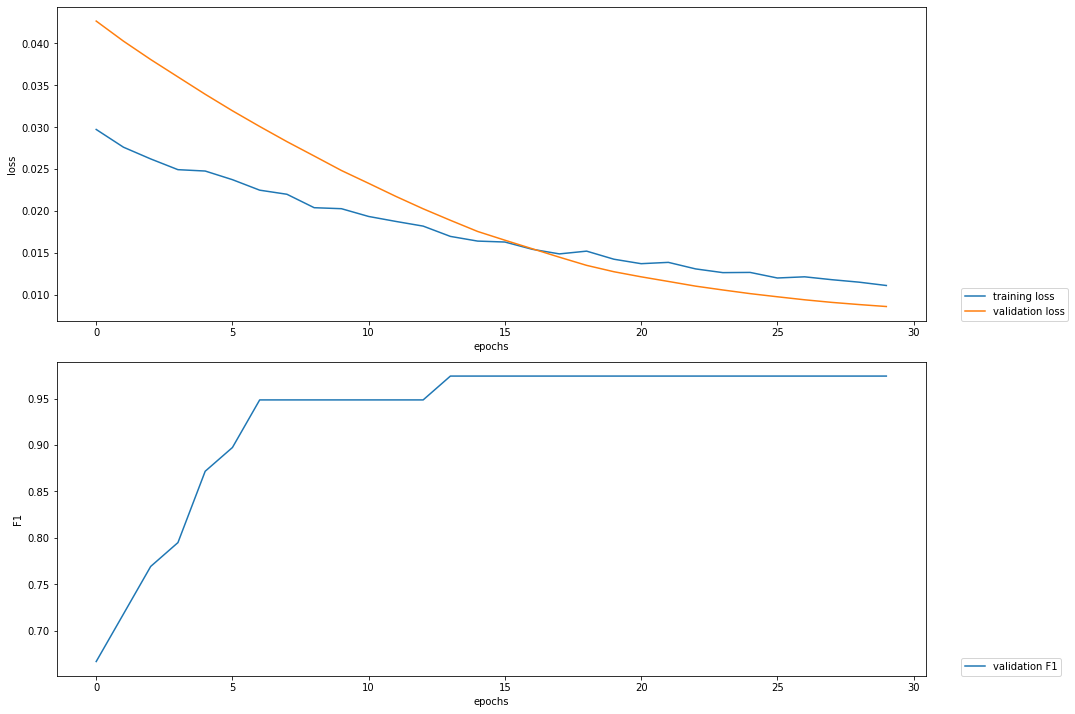

2023-01-02 06:18:06,487 Weights plots are saved in resources/taggers/sentiment/weights.png


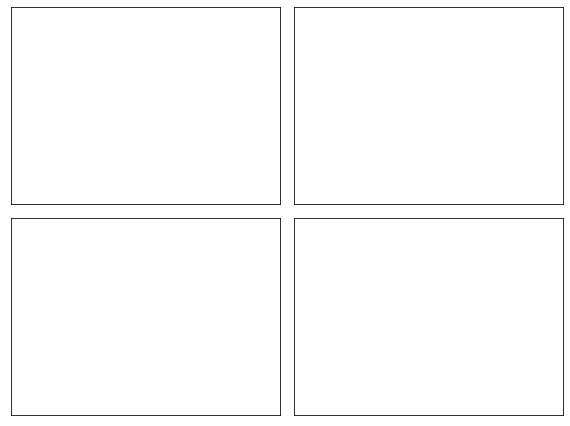

In [ ]:
# generate model and train it

# 1. Create a corpus
"""
Corpus is like a vocabulary. It contains all the data available.
It also splits the training dataset automatically into train and validation data.
"""

data_folder = "/content/data"
column_name_map = {2 : "text",
                   3 : "label"}
label_type = "class"
train_file = "train.csv"
test_file = "test.csv"
dev_file = None
skip_header = True
delimiter = ','
quotechar = '"'
corpus : Corpus = CSVClassificationCorpus(data_folder=data_folder,
                                          column_name_map=column_name_map,
                                          label_type=label_type,
                                          train_file=train_file,
                                          test_file=test_file,
                                          dev_file=dev_file,
                                          skip_header=skip_header,
                                          delimiter=delimiter,
                                          quotechar=quotechar
                                          )


# 2. Create the label dictionary
"""
Label dictionary contains a mapping of labels to positive and negative samples in the dataset.
"""

label_dictionary = corpus.make_label_dictionary(label_type=label_type)


# 3. Make a list of word embeddings
"""
Word embeddings are numerical representations of text. They capture the contextual neaning of each word.
We are using the RoBERTa model pre-trained on twitter sentiment analysis dataset.
"""

word_embeddings = [TransformerWordEmbeddings('cardiffnlp/twitter-roberta-base-sentiment-latest')]


# 4. Make document embeddings
"""
Document embeddings convert the word embeddings which are generated for each word into a single embedding for the entire document.
This gives us a much denser representation of the document.
"""

hidden_size = 512
reproject_words = True
reproject_words_dimension = 256
rnn_type = "LSTM"
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(embeddings=word_embeddings,
                                                                   hidden_size=hidden_size,
                                                                   reproject_words=reproject_words,
                                                                   reproject_words_dimension=reproject_words_dimension,
                                                                   rnn_type=rnn_type
                                                                   )        


# 5. Create the text classifier
"""
This is the model we use for the classifcation of text. 
"""

classifier = TextClassifier(document_embeddings=document_embeddings,
                            label_dictionary=label_dictionary,
                            label_type=label_type,
                            multi_label=False
                            )


# 6. initialize the text classifier trainer
"""
We are using Flair's inbuilt trainer for training our model
"""

trainer = ModelTrainer(model=classifier, corpus=corpus)


# 7. start the training
"""
We will use the AdamW optimizer and CosineAnnealingLR scheduler from PyTorch library for the best results
"""

learning_rate = 1e-6
weight_decay = 0.1
T_max = 30
base_path = "/content/FlairModel"
max_epochs = 30
train_with_dev = False
optimizer = AdamW(classifier.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = CosineAnnealingLR(optimizer, T_max=T_max)
trainer.train(base_path=base_path,
              max_epochs=max_epochs,
              train_with_dev=train_with_dev,
              scheduler=scheduler,
              optimizer=optimizer
              )

# 8. plot training curves (optional)
"""
Now we will plot the loss curves of train and test data to understand how good the model is.
If the train loss keeps decreasing, but the validation loss decreases and increases it is a sign of overfitting.
If the model overfits it cannot generalize well to new data.
"""

plotter = Plotter()
plotter.plot_training_curves('/content/FlairModel/loss.tsv')

# Use trained weights provided by us to load the model



1.   Download the trained weights file, final-model.pt from the following 
[Google Drive Link](https://drive.google.com/file/d/1hUjDOIY8pGvfmPLQFx24kpDS9yZAFB1J/view?usp=share_link)
2.   Create a directory called FlairModel in /content in Google Colab
3.   Upload final-model.pt to the FlairModel directory
4.   Run cells under "Imports, download datasets, pre-process datasets" for checking our model's accuracy
5.   Move on to results to obtain inferences







# Results of the model:

The loss curves indicate that the model has not overfit to the data and hence the model will be able to generalize well to new data.

We achieve a validation F1 score of 0.9744 which is quite good. Some of the feedback sentences are quite ambiguous as to whether they are positive or negative. Hence expecting a machine learning model to classify them correctly is quite the long shot.

In [ ]:
# Load the final model with the best fit for inference
base_path = "/content/FlairModel"
model_path = os.path.join(base_path, "final-model.pt")
classifier = TextClassifier.load(model_path)

In [ ]:
# Generate predictions for the train dataset

# 1. Generate train sentences
train_df=pd.read_csv("/content/data/train.csv")
train_sentences=train_df["text"].apply(lambda x: Sentence(x))

# 2. Generate predictions for the test sentences
predictions = []
for i in range(len(train_sentences)):
    classifier.predict(train_sentences[i])
    predictions.append(int(train_sentences[i].labels[0].value))
train_df["prediction"] = predictions

# 3. Write the predictions to a .csv file
train_df.to_csv("Train_Predictions_Without_Confidence_Score.csv",index=False)

# 4. Add the confidence score to the predictions for further analysis and write them to a .csv file
scores = []
for i in range(len(train_sentences)):
    scores.append(train_sentences[i].score)
train_df["sentiment_score"] = scores

train_df.to_csv("Train_Predictions_With_Confidence_Score.csv",index=False)

In [ ]:
# Generate predictions for the unlabelled test dataset

# 1. Generate test sentences
test_df=pd.read_csv("/content/data/test.csv")
test_sentences=test_df["Verbatim Feedback "].apply(lambda x: Sentence(x))

# 2. Generate predictions for the test sentences
for i in range(len(test_sentences)):
    classifier.predict(test_sentences[i])
    test_df["Sentiment (1=Positive & 0= Negative)"][i]=test_sentences[i].labels[0].value

# 3. Write the predictions to a .csv file
test_df.to_csv("Test_Predictions_Without_Confidence_Score.csv",index=False)

# 4. Add the confidence score to the predictions for further analysis and write them to a .csv file
scores = []
for i in range(len(test_sentences)):
    scores.append(test_sentences[i].score)
test_df["Sentiment_Score"] = scores

test_df.to_csv("Test_Predictions_With_Confidence_Score.csv",index=False)

In [ ]:
#evaluate performance metrics of the model on the entire training dataset

def run_model_metrics(samples_df, prediction, target):
    correct = 0
    incorrect_index = []

    true_n = 0
    false_n = 0
    true_p = 0
    false_p = 0
    for i in range(len(prediction)):
        if(prediction[i]==1 and target[i]==1):
            true_p += 1
            correct += 1
        elif(prediction[i]==1 and target[i]==0):
            false_p += 1
            incorrect_index.append(i)
        elif(prediction[i]==0 and target[i]==1):
            false_n += 1
            incorrect_index.append(i)
        elif(prediction[i]==0 and target[i]==0):
            true_n += 1
            correct += 1
            
    precision = (true_p) / (true_p + false_p)
    recall = (true_p) / (true_p + false_n)
    f1 = (2 * precision * recall) / (precision + recall)

    accuracy = (correct/len(target)) * 100
    print(f"Number of samples classified correctly : {correct}")
    print(f"Number of samples classified incorrectly : {len(target) - correct}")
    print(f"Accuracy of model : {accuracy}")
    print(f"F1 Score : {f1}")
    print("Incorrectly classified samples:")
    display(samples_df.iloc[incorrect_index])

target = train_df["label"].to_list()
run_model_metrics(train_df, predictions, target)

# To obtain inference on a new sentence

In [ ]:
text = "ADD FEEDBACK SENTENCE HERE"
sentence = Sentence(text)
classifier.predict(sentence)
prediction = sentence.labels[0].value
confidence = sentence.score
print(f"{text} : {Prediction} with a confidence of {confidence}")